In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as st
import seaborn as sns
import scipy

from numpy.linalg import matrix_power
from numpy.linalg import solve

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

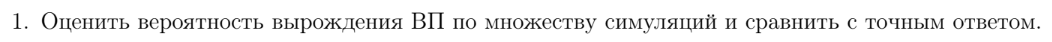

In [7]:
p = 1/2
freq = 0

for i in range(1000):
    S = 1
    for j in range(100):
        tmp = np.sum(st.geom(p).rvs(size=S))-S
        S = tmp
        if S == 0:
            freq += 1
            break
            
print(freq/1000)        

0.994


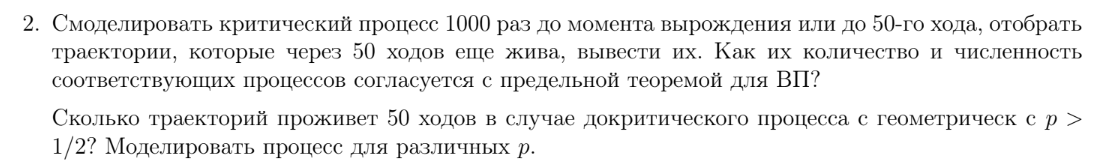

In [11]:
p = 1/2+1/100
freq = 0

for i in range(1000):
    S = 1
    for j in range(50):
        tmp = np.sum(st.geom(p).rvs(size=S))-S
        S = tmp
        if S == 0:
            freq += 1
            break
            
print(freq/1000)    

0.995


In [13]:
p = 1/2+1/10
freq = 0

for i in range(1000):
    S = 1
    for j in range(50):
        tmp = np.sum(st.geom(p).rvs(size=S))-S
        S = tmp
        if S == 0:
            freq += 1
            break
            
print(freq/1000)    

1.0


0.979


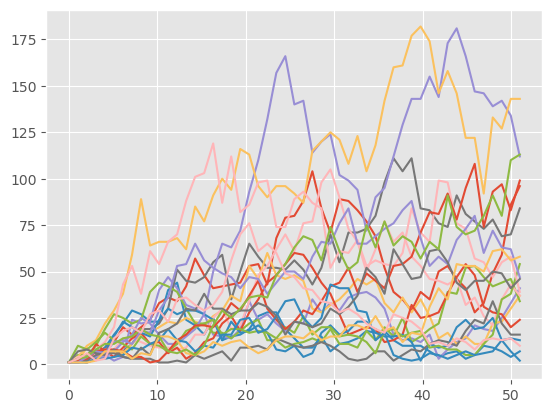

In [4]:
p = 0.5
freq = 0

for i in range(1000):
    S = 1
    t = [1]
    flag = True
    for j in range(50):
        a = st.geom.rvs(p, size=S)-1
        tmp = np.sum(a)
        S = tmp
        if S == 0:
            freq += 1
            flag = False
            break
        t.append(tmp)
    if flag == True:
        plt.plot(np.linspace(0,51, 51), t)
            
print(freq/1000)

#P(Z_{50}>0)~2/(50*var) ~ 0.02

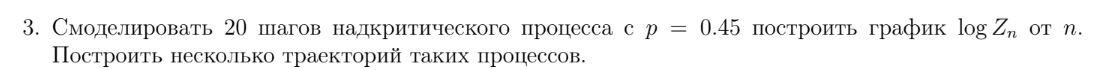

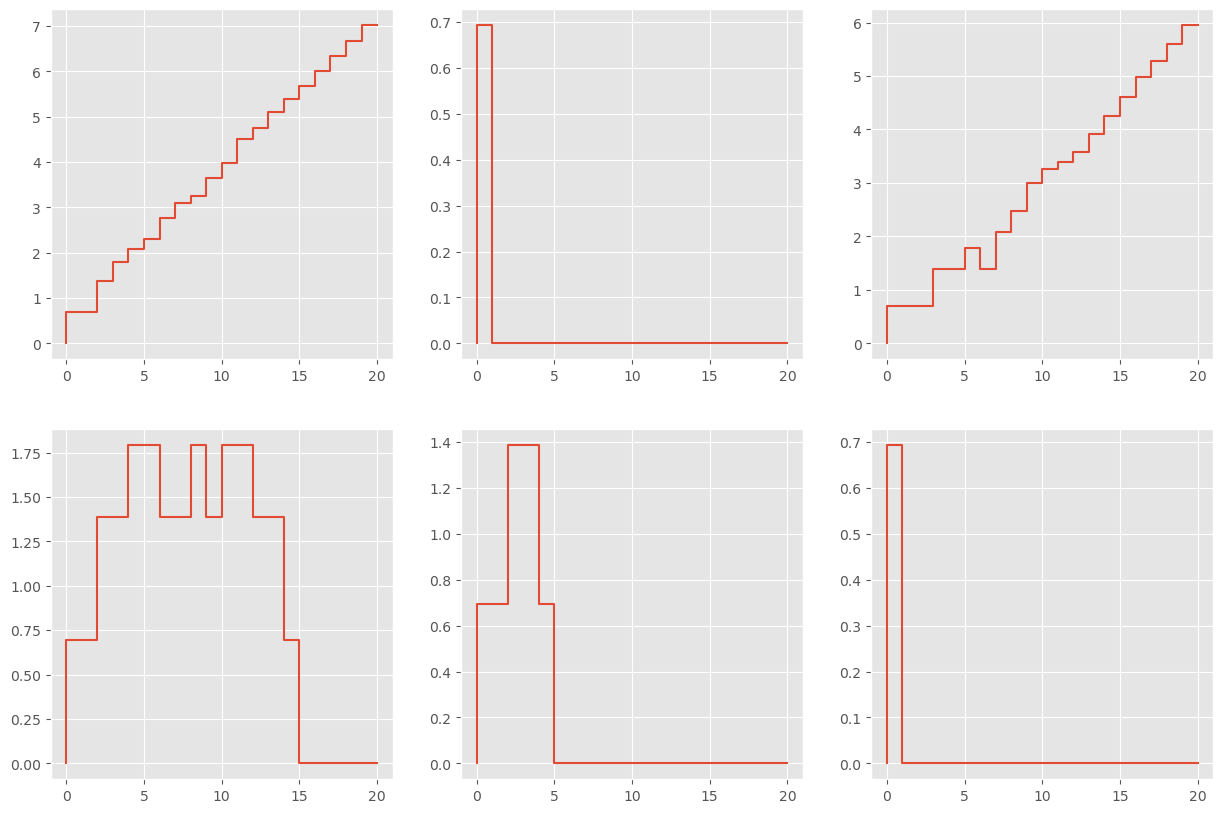

In [92]:
p = 100/145
freq = 0

fig, axs = plt.subplots(2, 3, figsize=(15, 10))


for i in range(3):
    S = 1
    y = np.zeros(21)
    y[0] = 0
    
    for j in range(1, 21):
        tmp = 2*np.sum(st.bernoulli(p).rvs(size=S))
        S = tmp
        if S != 0:
            y[j] = np.log(S)
        
        if S == 0:
            freq += 1
            break
    
    x = np.linspace(0, 20, 21)
    axs[0, i].step(x, y)
    
for i in range(3):
    S = 1
    y = np.zeros(21)
    y[0] = 0
    
    for j in range(1, 21):
        tmp = 2*np.sum(st.randint(0, 2).rvs(size=S))
        S = tmp
        if S != 0:
            y[j] = np.log(S)
        
        if S == 0:
            freq += 1
            break
    
    x = np.linspace(0, 20, 21)
    axs[1, i].step(x, y)

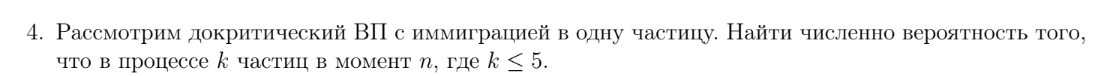

In [47]:
p = 5/9
n = 15

probs = []
for k in range(1, 6):
    
    freq = 0
    for i in range(100):
        S = 1
        for j in range(n):
            a = st.geom(p).rvs(size=S)-1
            tmp = np.sum(a)+1
            S = tmp
        if S == k:
            freq += 1

    probs.append(freq/100)
    
print(probs)


[0.24, 0.15, 0.13, 0.11, 0.09]


In [49]:
print([probs[i-1]/probs[i] for i in range(1, 4)])

[1.6, 1.1538461538461537, 1.1818181818181819]


Введите k от 1 до 20 2
Введите n от 1 до 20 15


Траектории: 


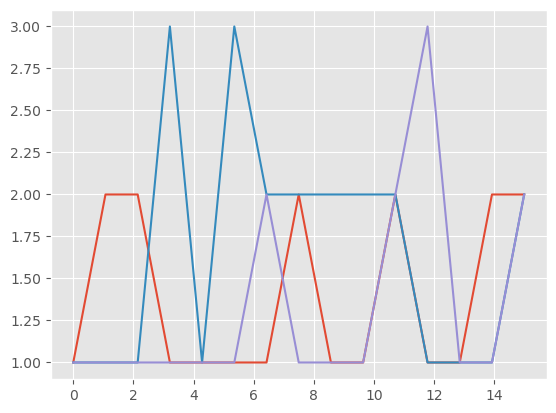

In [40]:
p = 3/4
freq = 0
k = int(input('Введите k от 1 до 20'))
n = int(input('Введите n от 1 до 20'))

print('Траектории: ')
for i in range(20):
    S = 1
    arr = [1]
    for j in range(n-1):
        a = st.geom(p).rvs(size=S)-1
        tmp = np.sum(a)+1
        S = tmp
        arr.append(S)
        
    if S == k:
        freq += 1
        plt.plot(np.linspace(0, n, n), arr)